## Phase 4.33 
# Principal Component Analysis (PCA), The Curse of Dimensionality

## Objectives
- Explain the difference between <a href='#learning'>Supervised and Unsupervised Learning</a>.
- Gain an intuitive understanding of <a href='#pca'>PCA and Eigenvalue Decomposition</a>.
    - Walk through the <a href='#walkthrough'>process of PCA</a> in Python.
- Discuss the <a href='#curse'>Curse of Dimensionality</a>.
- <a href='#projecting'>Exercise</a>: Recasting 100-dimensions and checking explained variance.

<a id='learning'></a>
# Learning Types
## Supervised
- Supervised learning is done to **predict on labeled data**.
    - All algorithms we've used in scikit-learn and statsmodels are supervised learning models.

## Unsupervised
- Unsupervised learning is done **without labels**.
    - *PCA*, *Clustering* algorithms are unsupervised.

<a id='pca'></a>
# PCA

- PCA is a form of **dimensionality reduction.**
- It is considered *unsupervised* because we only input the **number of resulting dimensions**.
- PCA reduces the dimensionality of the feature set into **$n$-principal components** which attempt to capture the maximum variance from the original data.
- **Principal Components** are linear combinations of original features.

## How does it work?
***Linear Algebra!***
Mathematically, Principal Components are found through doing **Eigendecomposition** of the *Covariance Matrix*.

1. Recenter the data so the mean of each feature is 0.
2. Get the covariance matrix.
    - Covariance is like correlation, but not normalized.
3. Get the **eigenvectors** of the covariance matrix.
4. **Sort** the eigenvectors.
5. Multiply the top-$n$ eigenvectors by the recentered data.

<a id='walkthrough'></a>
## Long-Hand in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('seaborn-talk')

### Setup

In [3]:
# Setup: get some data.
np.random.seed(51)

x1 = np.random.uniform(low=0, high=10, size=100)
x2 = [(xi*3)+np.random.normal(scale=5) for xi in x1]

X = np.concatenate((x1.reshape(-1, 1),np.array(x2).reshape(-1, 1)), axis=1)
X[:5]

array([[ 6.75731416, 18.2737887 ],
       [ 0.44712182,  3.00325497],
       [ 3.43303673, 12.13302803],
       [ 6.44019727, 22.68194154],
       [ 2.84212999,  7.89581285]])

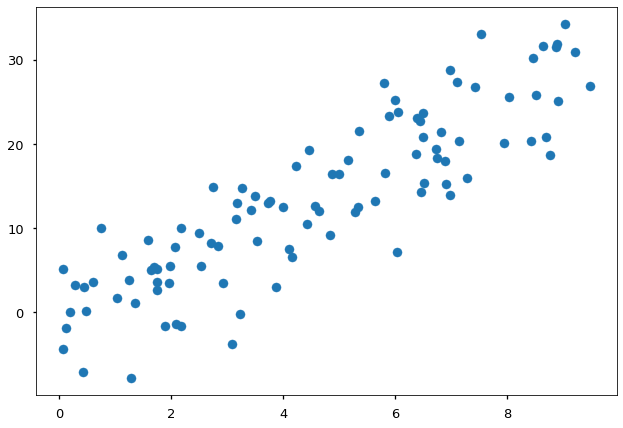

In [4]:
# Visualize our data.
plt.scatter(X[:, 0], X[:, 1]);

### Step 1: Recenter

In [5]:
X_recentered = X - X.mean(axis=0)

X_recentered[:5]

array([[  2.24366369,   4.9829489 ],
       [ -4.06652864, -10.28758484],
       [ -1.08061374,  -1.15781178],
       [  1.92654681,   9.39110173],
       [ -1.67152047,  -5.39502696]])

### Step 2: Covariance

Covariance is very similar to correlation, but is not normalized. The formula for the covariance of two variables $X$ and $Y$ is:

$$cov(X,Y) = \frac{\sum_i^n(X_i -\mu_X)(Y_i - \mu_Y)}{n-1}$$

<img src='./images/covmat.png' width=300>

In [6]:
X_cov = np.cov(X_recentered.T)

X_cov

array([[  7.31017425,  23.79635916],
       [ 23.79635916, 100.89547148]])

### Step 3: Eigendecomposition

Eigendecomposition is a form of Matrix decomposition (where we want to find a product of matrices that is equal to the initial Matrix).

In this case, we want to decompose the Matrix into **eigenvectors** and **eigenvalues**.

---

A vector $v$ is an **eigenvector** of a **square matrix** $A$ if it satisfies the following equation:

$$\large Av = \lambda v$$

> *Lambda ($\lambda$) represents the eigenvalue .*

The parent matrix can be shown to be a product of the eigenvectors and eigenvalues.

$$\large A = Q . diag(V) . Q^{-1}$$

> $Q$ is a matrix comprised of the **eigenvectors**, $diag(V)$ is a diagonal matrix comprised of the **eigenvalues** along the diagonal (and zeros everywhere else), and $Q^{-1}$ is the inverse of the matrix comprised of the eigenvectors.

<img src='./images/eig1.png' width=500>

In [7]:
# Single operation from numpy.
eig_values, eig_vectors = np.linalg.eig(X_cov)

print(f'Eigenvalues:\n{eig_values}\n\nEigenvectors:\n{eig_vectors}')

Eigenvalues:
[  1.6069309  106.59871484]

Eigenvectors:
[[-0.97246036 -0.23306835]
 [ 0.23306835 -0.97246036]]


In [8]:
# Sanity check.
print('Dot Product of covariance matrix and first eigenvector)')
print(X_cov.dot(eig_vectors[:, 0]))
print()
print('(First column of eigenvectors) * (first eigenvalue)')
print(eig_vectors[:, 0] * eig_values[0])

Dot Product of covariance matrix and first eigenvector)
[-1.56267659  0.37452473]

(First column of eigenvectors) * (first eigenvalue)
[-1.56267659  0.37452473]


### Step 4: Sort Eigenvectors

In [9]:
idx = np.argsort(eig_values)[::-1]
# eig_values_sorted = eig_values[idx]
eig_vectors_sorted = eig_vectors[:, idx]

# print(f'Values\nOriginal:\n{eig_values}\nSorted:\n{eig_values_sorted}\n')
print(f'Vectors\nOriginal:\n{eig_vectors}\nSorted:\n{eig_vectors_sorted}\n')

Vectors
Original:
[[-0.97246036 -0.23306835]
 [ 0.23306835 -0.97246036]]
Sorted:
[[-0.23306835 -0.97246036]
 [-0.97246036  0.23306835]]



###  Step 5: Multiply the Top-$n$ Eigenvectors by the Recentered Data

In [10]:
N = 1

recast_data = eig_vectors_sorted[N-1].dot(X_recentered.T).T.reshape(-1, 1)
recast_data[:5]

array([[-5.36864725],
       [10.95204753],
       [ 1.37778291],
       [-9.58149122],
       [ 5.63602835]])

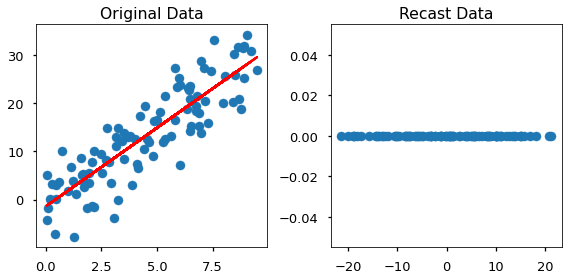

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
x, y = X[:, 0], X[:, 1]

# Points and regression line.
ax1.scatter(x, y)
m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x + b, color='red')
ax1.set(title='Original Data')

# Recast data on 1-dimension.
ax2.scatter(recast_data, y=[0]*recast_data.shape[0])
ax2.set(title='Recast Data')
fig.tight_layout()

<img src="./images/pca.gif">

## Short-Hand with Scikit-Learn

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=1)
pca_recast = pca.fit_transform(X)

In [14]:
pca_recast

array([[  5.36864725],
       [-10.95204753],
       [ -1.37778291],
       [  9.58149122],
       [ -5.63602835],
       [ 14.3940623 ],
       [ -5.24960075],
       [-10.10883274],
       [ 10.10448726],
       [  3.09721269],
       [-10.08023319],
       [-15.005359  ],
       [  1.41828512],
       [ -4.28068523],
       [ -5.73675353],
       [-13.73899486],
       [-13.37252352],
       [ -9.94824215],
       [  5.83337758],
       [-10.36009963],
       [ 19.92415778],
       [  3.18038106],
       [  0.13735499],
       [  7.50910499],
       [  3.43924687],
       [  9.97477579],
       [  7.44398025],
       [  8.28710521],
       [  0.28679241],
       [-16.92434196],
       [ -5.59680329],
       [ -0.47175891],
       [ 18.75871487],
       [ 14.26304744],
       [  3.85566649],
       [  6.28899541],
       [-13.88426921],
       [ -0.62359035],
       [ -8.32311474],
       [  7.73753614],
       [-10.01078243],
       [ 13.7297316 ],
       [ 17.35792485],
       [ -8

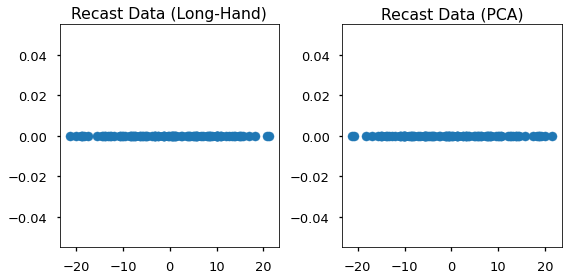

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,4))
ax1.scatter(recast_data, y=[0]*recast_data.shape[0])
ax1.set(title='Recast Data (Long-Hand)')

ax2.scatter(pca_recast, y=[0]*pca_recast.shape[0])
ax2.set(title='Recast Data (PCA)')
fig.tight_layout()

<a id='curse'></a>
# Curse of Dimensionality

- As we add more features to our data, data points become more and more sparse.
- When the distance between points becomes large, some algorithms' performance suffers.
- The larger the dataset, the more space and time it requires to work with.


In [16]:
# Define function to calculate euclidean distance.
def euclidean_distance(p1, p2):
    return np.sqrt(sum([(q - p)**2 for p, q in zip(p1, p2)]))[0]


point = np.ones((5, 1))
origin = np.zeros((5, 1))

euclidean_distance(point, origin)

2.23606797749979

In [17]:
# Calculate distance from the origin from a point at:
# [1]*n for increasing dimensions.
n_dimensions = range(1, 1000+1)
distances = []

for n in n_dimensions:
    point = np.ones((n, 1))
    origin = np.zeros((n, 1))
    distances.append(euclidean_distance(point, origin))

In [18]:
distances

[1.0,
 1.4142135623730951,
 1.7320508075688772,
 2.0,
 2.23606797749979,
 2.449489742783178,
 2.6457513110645907,
 2.8284271247461903,
 3.0,
 3.1622776601683795,
 3.3166247903554,
 3.4641016151377544,
 3.605551275463989,
 3.7416573867739413,
 3.872983346207417,
 4.0,
 4.123105625617661,
 4.242640687119285,
 4.358898943540674,
 4.47213595499958,
 4.58257569495584,
 4.69041575982343,
 4.795831523312719,
 4.898979485566356,
 5.0,
 5.0990195135927845,
 5.196152422706632,
 5.291502622129181,
 5.385164807134504,
 5.477225575051661,
 5.5677643628300215,
 5.656854249492381,
 5.744562646538029,
 5.830951894845301,
 5.916079783099616,
 6.0,
 6.082762530298219,
 6.164414002968976,
 6.244997998398398,
 6.324555320336759,
 6.4031242374328485,
 6.48074069840786,
 6.557438524302,
 6.6332495807108,
 6.708203932499369,
 6.782329983125268,
 6.855654600401044,
 6.928203230275509,
 7.0,
 7.0710678118654755,
 7.14142842854285,
 7.211102550927978,
 7.280109889280518,
 7.3484692283495345,
 7.416198487095663,

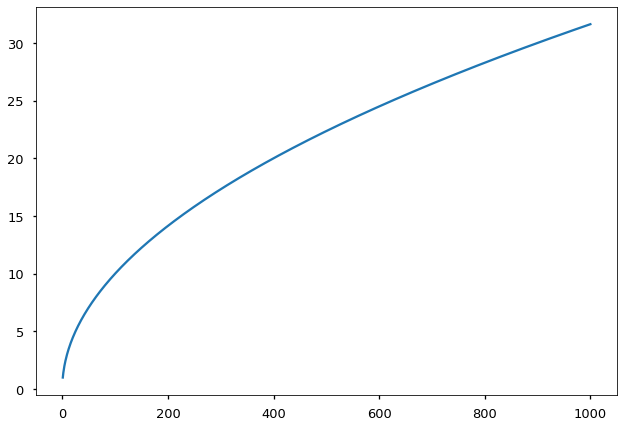

In [19]:
plt.plot(n_dimensions, distances)

<a id='projecting'></a>
# Projecting: 100 Dimensions => 2

In [20]:
from sklearn.datasets import make_blobs

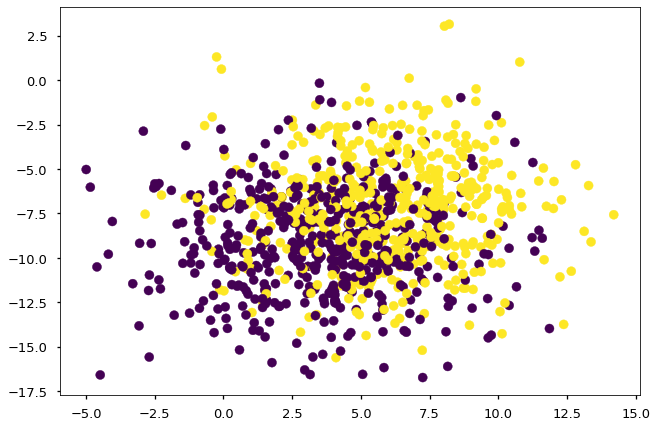

In [21]:
# Make toy dataset.
X, y = make_blobs(
    n_samples=1000,
    n_features=100,
    cluster_std=3,
    centers=2,
    random_state=51)

# Plot the clusters in 2-dimensions by choosing two of the features.
plt.scatter(X[:,0], X[:,1], c=y);

In [22]:
# Perform PCA on dataset and cast into two-dimensions.
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

In [23]:
X_new

array([[ 44.327563  ,   1.07623311],
       [ 49.14635794,   0.96853295],
       [-43.46860591,   3.05236878],
       ...,
       [ 44.16043205,  -1.63627982],
       [ 43.72483862,   3.57973201],
       [ 49.5150677 ,  -0.42303426]])

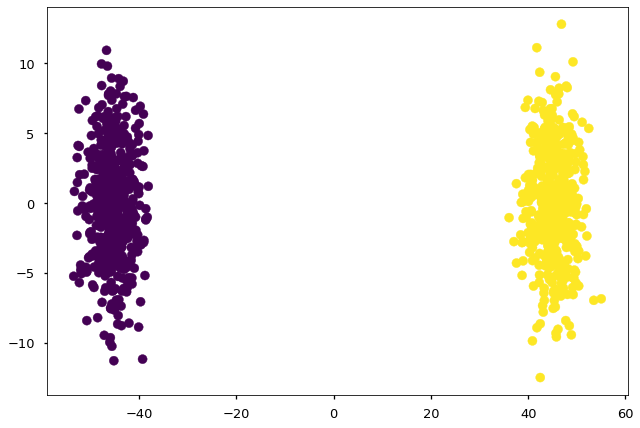

In [24]:
# Plot data from the Principal Components.
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)

Explained Variance Ratio:
	[0.69997475 0.00511131]


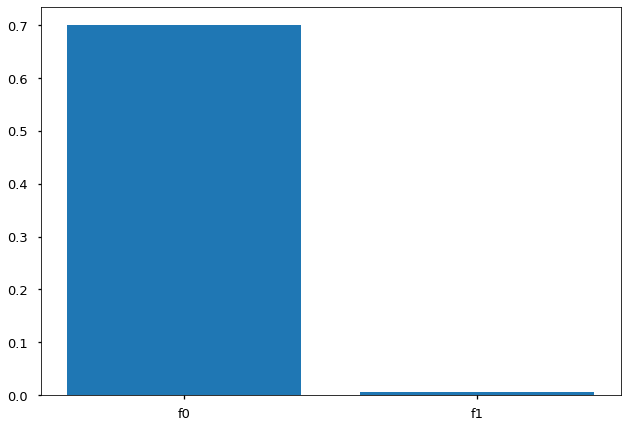

In [25]:
# Explained variance.
print(f'Explained Variance Ratio:\n\t{pca.explained_variance_ratio_}')
plt.bar(['f0', 'f1'], pca.explained_variance_ratio_);

In [26]:
# Find total explained variance for number of PC.
x_val_lst = range(2, 100, 2)
explained_variance = [
    sum(PCA(n_components=x).fit(X, y).explained_variance_ratio_)
    for x in x_val_lst
]

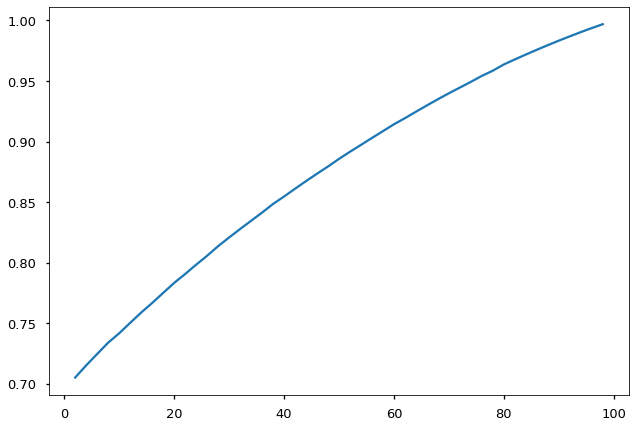

In [27]:
plt.plot(x_val_lst, explained_variance)

# Multiple Correspondence Analysis (MCA): Categorical Variables

In [28]:
import mca

import pandas as pd
import seaborn as sns

In [29]:
df = sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [30]:
y = df['mpg']
X = df[['origin', 'cylinders', 'model_year']].astype('O')

X_dummies = pd.get_dummies(X)
X_dummies

,origin_europe,origin_japan,origin_usa,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,model_year_70,model_year_71,...,model_year_73,model_year_74,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82
0,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
394,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
395,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
396,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
mca_df = mca.MCA(X_dummies)
mca_df

In [32]:
mca_df.fs_r(1).shape

(398, 18)

In [33]:
mca_df.fs_r(N=2)

array([[-8.99638126e-01, -4.51138073e-01],
       [-8.99638126e-01, -4.51138073e-01],
       [-8.99638126e-01, -4.51138073e-01],
       [-8.99638126e-01, -4.51138073e-01],
       [-8.99638126e-01, -4.51138073e-01],
       [-8.99638126e-01, -4.51138073e-01],
       [-8.99638126e-01, -4.51138073e-01],
       [-8.99638126e-01, -4.51138073e-01],
       [-8.99638126e-01, -4.51138073e-01],
       [-8.99638126e-01, -4.51138073e-01],
       [-8.99638126e-01, -4.51138073e-01],
       [-8.99638126e-01, -4.51138073e-01],
       [-8.99638126e-01, -4.51138073e-01],
       [-8.99638126e-01, -4.51138073e-01],
       [ 3.31115907e-01, -4.22249651e-01],
       [-7.07182682e-01,  1.19776081e-01],
       [-7.07182682e-01,  1.19776081e-01],
       [-7.07182682e-01,  1.19776081e-01],
       [ 3.31115907e-01, -4.22249651e-01],
       [ 2.19759019e-01, -8.66832066e-02],
       [ 2.19759019e-01, -8.66832066e-02],
       [ 2.19759019e-01, -8.66832066e-02],
       [ 2.19759019e-01, -8.66832066e-02],
       [ 2.

In [34]:
for percent in np.arange(1, 0, -0.05):
    print('Percent:', round(percent, 3),
          'Columns:', mca_df.fs_r(percent).shape[1])

Percent: 1.0 Columns: 18
Percent: 0.95 Columns: 15
Percent: 0.9 Columns: 14
Percent: 0.85 Columns: 12
Percent: 0.8 Columns: 11
Percent: 0.75 Columns: 10
Percent: 0.7 Columns: 9
Percent: 0.65 Columns: 8
Percent: 0.6 Columns: 7
Percent: 0.55 Columns: 6
Percent: 0.5 Columns: 5
Percent: 0.45 Columns: 5
Percent: 0.4 Columns: 4
Percent: 0.35 Columns: 3
Percent: 0.3 Columns: 3
Percent: 0.25 Columns: 2
Percent: 0.2 Columns: 1
Percent: 0.15 Columns: 1
Percent: 0.1 Columns: 1
Percent: 0.05 Columns: 1
